# Análise exploratória de dados
 - Conjunto de dados: `student_habits_performance`
---

## PRÉ-INÍCIO


In [ ]:
"""

Iniciamos importando todas as bibliotecas que serão/poderão ser úteis durante nossa análise de dados (Caso alguma biblioteca externa não esteja instalada, a exceção será ativada para instalação).

"""

try:
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
except ModuleNotFoundError:
    %pip install seaborn matplotlib pandas numpy
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

import os
import sys
import itertools
from scipy import stats as st
from IPython.display import Markdown

# pega a pasta raiz do projeto (uma pasta acima de onde está este notebook)
proj_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(proj_root)
# importamos as funções feitas em python da análise univariada
from src.funcoes_pre_processamento import *

In [ ]:
# @title Leitura do conjunto de dados

"""

Agora, com o auxílio da função 'read_csv', lemos o conjunto de dados, definindo-o como a variável 'df', ou seja, dataframe.

"""
caminho_csv = os.path.join("..", "dados", "student_habits_performance.csv")
df = carregar_dados(caminho_csv)

## LIMPEZA E PREPARAÇÃO DOS DADOS

In [ ]:
# @title Informações iniciais

"""

 A fim de compreender o formato e o conteúdo presente no dataset, obtemos algumas informações iniciais como as informações das primeiras e últimas linhas, informações das variáveis e
 a quantidade de valores únicos de cada variável.

"""

display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Ultimas linhas"))
display(df.tail())

"""

Com apenas a visualização de algumas linhas, usando as funções '.head()' e '.tail()', já é possível observar a quantidade de colunas do dataset, isto é, quantas variáveis ele apresenta.
Também é possível ver que algumas variáveis são objetos, outras são inteiras/float e outras são booleanas.

"""

display(Markdown("### Informação das variáveis"))
df.info()

"""

A partir do uso da função '.info()', é possível ver de uma forma geral aquilo que se pôde tirar da análise das primeiras e últimas linhas.
Pode-se ver que o conjunto de dados possui, ao todo, 16 colunas, sendo uma delas o id do estudante(student_id) que não possui utilidade na predição e também a coluna (exam_score), que no nosso caso, é a variável alvo.
Sendo assim, tirando essas duas colunas, concluimos que o dataset possui 14 variáveis preditoras, ou seja, 14 variáveis que serão utilizadas no processo de análise e predição.
Por meio da função, também foi possível identificar quantos valores não-nulos cada variável possui e, a partir disso, verificar se há valores faltantes. Nesse caso, foi visto que a variável 'parental_education_level' possui 909 não-nulos, ou seja, 91 valores faltantes.
Esse problema de valores faltantes será resolvido posteriormente.

"""

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

"""

A partir da função '.nunique()', conseguimos analisar quantos valores diferentes de cada variável há no dataset. A partir disso, podemos tirar, por exemplo, que os estudantes do dataset possuem até 8 diferentes idades e, assim, formar uma faixa etária.
Também pode-se ver quantos níveis de qualidade existem em variáveis como 'diet_quality' e 'internet_quality'.

"""


### Primeiras linhas

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Ultimas linhas

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

### Quantidade de valores únicos

"\n\nA partir da função '.nunique()', conseguimos analisar quantos valores diferentes de cada variável há no dataset. A partir disso, podemos tirar, por exemplo, que os estudantes do dataset possuem até 8 diferentes idades e, assim, formar uma faixa etária.\nTambém pode-se ver quantos níveis de qualidade existem em variáveis como 'diet_quality' e 'internet_quality'.\n\n"

In [ ]:
# @title Dicionário de dados

"""

Uma vez tendo visto como o dataset está disposto, quais são as variáveis, suas características e tipos, vamos agora organizar todos esses dados em um dicionário.
Utilizamos esse dicionário a fim de descrever cada variável, separando-as por tipo e subtipo. O tipo pode ser qualitativo ou quantitativo.
Variáveis qualitativas descrevem qualidades e categorias (não numéricas), já as variáveis quantitativas expressam quantidades mensuráveis por números.
Dentro das variáveis qualitativas, há dois subtipos: nominal e ordinal. De forma simples, dizemos que o subtipo nominal está relacionado a variáveis que não possuem uma ordem inerente. Já a ordinal possui uma ordem ou hierarquia.
No caso, das variáveis quantitativas, há dois subtipos: discreta e contínua. Variáveis discretas são valores inteiros que não possuem intermediários e as variavéis contínuas são valores que podem ser decimais e que possuem infinitos valores entre dois inteiros.
A partir disso, foi feito a classificação abaixo.

"""

# Dicionário de dados completo
df_dict = obter_dicionario_de_dados()
df_dict

,variavel,descricao,tipo,subtipo
0,student_id,Identificador único para cada estudante.,qualitativa,nominal
1,age,Idade do estudante em anos.,quantitativa,discreta
2,gender,Gênero do estudante.,qualitativa,nominal
3,study_hours_per_day,Média de horas de estudo por dia.,quantitativa,contínua
4,social_media_hours,Média de horas em redes sociais por dia.,quantitativa,contínua
5,netflix_hours,Média de horas assistindo Netflix por dia.,quantitativa,contínua
6,part_time_job,Indica se o estudante tem trabalho de meio per...,qualitativa,nominal
7,attendance_percentage,Percentual de presença do estudante nas aulas.,quantitativa,contínua
8,sleep_hours,Média de horas de sono por noite.,quantitativa,contínua
9,diet_quality,"Qualidade da dieta (Good, Fair, Poor).",qualitativa,ordinal


In [ ]:
# @title Tratamento de dados faltantes

"""

Como visto anteriormente através da função '.info()', a variável 'parental_education_level' possui dados faltantes.
Sendo assim, visto que se trata de uma variável categórica, uma boa forma de tratar isso é preenchendo com a categoria mais frequente, ou seja, a moda.
O código abaixo faz exatamente isso. Ele primeiro confirma que a variável possui dados faltantes, depois encontra a moda usando '.mode()' e por fim preenche todos os valores faltantes com a moda.

"""
df = tratar_dados_faltantes(df, 'parental_education_level')

Valores nulos em 'parental_education_level' foram preenchidos com a moda: 'High School'


In [ ]:
# @title Verificação e Remoção de Duplicatas

"""

O código abaixo é usado simplesmente por precaução. Não foi visto nada acima que indicasse a existência de linhas repetidas no dataset, mas, a fim de confirmação, fazemos o passo abaixo.

"""

df = remover_duplicatas(df)

Nenhuma linha duplicada encontrada.


In [ ]:
# @title Verificação de Outliers

"""

Outliers são valores que se desviam significativamente de outras observações no conjunto de dados. É importante identificar e tratar os outliers, pois eles podem distorcer a análise estatística e os resultados de modelos de machine learning.
Uma maneira comum de visualizar outliers é através de box plots. O box plot mostra a distribuição dos dados com base em um resumo de cinco números: mínimo, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e máximo. Os valores que caem fora dos "bigodes" do box plot são geralmente considerados outliers.
Vamos visualizar isso no box plot abaixo.

"""

# Visualização de Outliers com Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['exam_score'])
plt.title('Box Plot exemplo para mostrar a existência de outliers')
plt.xlabel('Exam Score')
plt.show()

"""

No gráfico acima, podemos observar a presença de dois pontos fora do limite inferior, indicando a existência de outliers na variável 'exam_score'.
A seguir, definimos uma função para remover outliers com base no método do Intervalo Interquartil (IQR). Este método identifica como outliers os pontos de dados que estão abaixo de 'Q1 - 1.5 * IQR' ou acima de 'Q3 + 1.5 * IQR'. Esta função será utilizada posteriormente, quando necessário.

"""

# Função para Remover Outliers
def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    df_sem_outliers = df[(df[coluna] >= lim_inf) & (df[coluna] <= lim_sup)]
    return df_sem_outliers

## DEFINIÇÃO E ANÁLISE DA VARIÁVEL DE CLASSE

In [ ]:
# @title Discretização da variável 'exam_score'

"""

Visto que se pede o número de classes da variável-alvo 'exam_score' e ela é um valor contínuo, devemos discretizá-la. Não há uma maneira única de se fazer isso e a quantidade de classes é algo que pode variar dependendo da análise.
No caso dessa análise, escolhemos dividir as notas baseado no sistema utilizado na Universidade Federal do Ceará (UFC). Sendo assim, a classificação será da seguinte forma:
Quem obtém nota igual ou superior a 90, possui um desempenho 'Excelente'. Os que conseguem igual ou superior a 70, possuem o desempenho 'Bom'.
Já em relação aqueles que conseguem uma nota abaixo de 70, mas superior à 40, apresentam o desempenho 'Recuperação'. Por fim, aqueles com nota abaixo de 40, estão com desempenho 'Reprovado'.
Foi criada uma nova variável (performance_class) para guardar essas informações.

"""

df = discretizar_variavel_alvo(df)

Coluna 'performance_class' criada a partir de 'exam_score' com as novas definições de classes.


In [ ]:
# @title Análise da Distribuição da Classe

"""

Aqui, vemos como os alunos estão distribuidos em relação as classes que acabamos de criar da variável-alvo. Podemos ver que a maioria dos alunos possui o desempenho 'Recuperação', de acordo com a classificação feita.
Podemos ver também que a quantidade de alunos com desempenho 'Recuperação' ou 'Reprovado' é minimamente maior que a quantidade de alunos com desempenho 'Excelente' ou 'Bom'.

"""

display(Markdown("### Distribuição das Classes de Desempenho"))
class_distribution = df3['performance_class'].value_counts().reset_index()
class_distribution.columns = ['Classe de Desempenho', 'Número de Alunos']
display(class_distribution)

### Distribuição das Classes de Desempenho

,Classe de Desempenho,Número de Alunos
0,Recuperação,447
1,Bom,385
2,Excelente,126
3,Reprovado,42


C:\Users\User\AppData\Local\Temp\ipykernel_836\3295685531.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, x='performance_class', palette='viridis', order=['Reprovado', 'Recuperação', 'Bom', 'Excelente'])


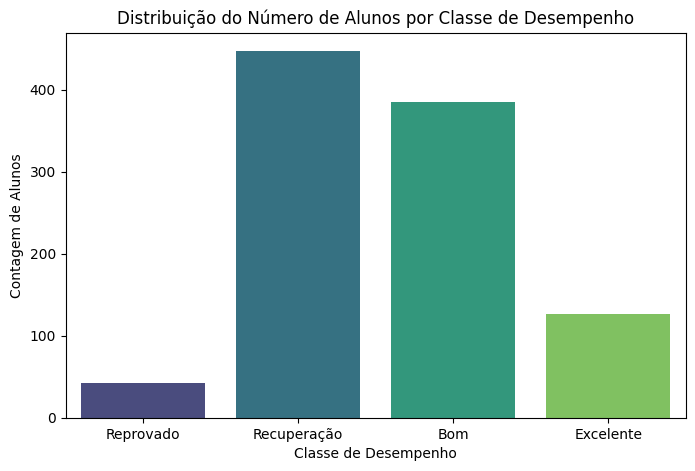

In [ ]:
# @title Visualização da distribuição

"""

Aqui podemos ver melhor a distribuição das classes criadas e suas respectivas quantidades, destacando o que foi dito acima.

"""

plt.figure(figsize=(8, 5))
sns.countplot(data=df3, x='performance_class', palette='viridis', order=['Reprovado', 'Recuperação', 'Bom', 'Excelente'])
plt.title('Distribuição do Número de Alunos por Classe de Desempenho')
plt.xlabel('Classe de Desempenho')
plt.ylabel('Contagem de Alunos')
plt.show()

## DESCRIÇÃO FORMAL E ESTATÍSTICAS GERAIS

In [ ]:
"""

Nessa célula, basicamente formalizamos a quantidade de observações, de preditores e de classes da variável-alvo presentes no dataset, sendo respectivamente N, D e L.
Além disso, com o uso da função '.describe()', obtemos algumas estatísticas descritivas básicas de cada variável preditora, como média, desvio padrão, valor mínimo, máximo e quartis.
Esses dados são importantes para fornecer uma visão inicial sobre a distribuição e a variabilidade dos atributos, permitindo identificar possíveis outliers, tendências centrais e diferenças de escala entre as variáveis.
Essa análise preliminar é fundamental para orientar as etapas posteriores da exploração dos dados e garantir uma melhor compreensão do comportamento geral do conjunto de dados.

"""

N = df3.shape[0]
D = df3.shape[1] - 3  # Total de colunas - student_id - exam_score - performance_class
L = df3['performance_class'].nunique()

print(f"O conjunto de dados analisado possui N = {N} observações.")
print(f"Cada observação é descrita por D = {D} variáveis preditoras.")
print(f"A variável alvo foi discretizada em L = {L} classes: {list(df3['performance_class'].cat.categories)}.")
print("A distribuição das classes é apresentada na tabela e gráfico acima.")

display(Markdown("### Estatísticas Descritivas Gerais de Todas as Variáveis"))
display(df3.describe(include='all').drop('student_id', axis=1))

O conjunto de dados analisado possui N = 1000 observações.
Cada observação é descrita por D = 14 variáveis preditoras.
A variável alvo foi discretizada em L = 4 classes: ['Reprovado', 'Recuperação', 'Bom', 'Excelente'].
A distribuição das classes é apresentada na tabela e gráfico acima.


### Estatísticas Descritivas Gerais de Todas as Variáveis

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,performance_class
count,1000.0000,1000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000
unique,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN,4
top,NaN,Female,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN,Recuperação
freq,NaN,481,NaN,NaN,NaN,785,NaN,NaN,437,NaN,483,447,NaN,682,NaN,447
mean,20.4980,NaN,3.55010,2.505500,1.819700,NaN,84.131700,6.470100,NaN,3.042000,NaN,NaN,5.438000,NaN,69.601500,NaN
std,2.3081,NaN,1.46889,1.172422,1.075118,NaN,9.399246,1.226377,NaN,2.025423,NaN,NaN,2.847501,NaN,16.888564,NaN
min,17.0000,NaN,0.00000,0.000000,0.000000,NaN,56.000000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000,NaN
25%,18.7500,NaN,2.60000,1.700000,1.000000,NaN,78.000000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.475000,NaN
50%,20.0000,NaN,3.50000,2.500000,1.800000,NaN,84.400000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.500000,NaN
75%,23.0000,NaN,4.50000,3.300000,2.525000,NaN,91.025000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.325000,NaN


# Salva o DataFrame processado para uso futuro

In [ ]:
salvar_dataframe_processado(df3)

Arquivo salvo em: c:\Users\User\Desktop\ufc\TI0175 - INTELIGÊNCIA COMPUTACIONAL APLICADA\HomeWork_01\HW1----ICA-2025.2\dados\student_habits_preprocessed.csv
